In [2]:
#KNN
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv("/home/khyati/Downloads/Batch06/Batch06.csv")
import numpy as np
df = pd.DataFrame(file)

outlier = []
count = 0
for i in df.columns:
    count = 0                                 # Replacing all the outliers with mean of their
    lq = df[i].quantile(.25)                  # column
    hq = df[i].quantile(.75)
    IQR = hq-lq 
    md = df[i].mean()
    if(i != "Class"):
        for j in range(len(df[i])):
            if(df[i][j] < lq - 1.5*IQR or df[i][j] > hq + 1.5*IQR):
                df[i][j] = md
                count += 1
    outlier.append(count)
    
print(file.head())

   SEX  AGEGRP  REGION  REFILL_COUNT  ADMTYP  Total Knee Arthrolplasty  \
0    2       5       4            15       2                         0   
1    2       5       4            15       2                         0   
2    2       5       4            15       2                         0   
3    2       5       4            15       2                         0   
4    2       5       3             8       2                         0   

   OSTEOARTHROSIS secondary lower leg  Removal of Foreign Body from Eye  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Total Knee Replacement  OSTEOARTHROSIS primary lower leg  \
0                       0                

In [4]:
train = df.loc[:,"SEX":"Medicine"]
test = df["Class"]
acc = []

In [5]:
#unprocessed

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print("Accuracy ",accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy  0.9994301994301994

Confusion Matrix
[[1363    2]
 [   0 2145]]


In [6]:
#Normalized

norm = MinMaxScaler()
norm.fit(train)
train = norm.transform(train)

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print("Accuracy ",accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy  0.9977207977207977

Confusion Matrix
[[1359    6]
 [   2 2143]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
#Standardized

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print("Accuracy ",accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy  0.998005698005698

Confusion Matrix
[[1360    5]
 [   2 2143]]


[[1320   45]
 [  11 2134]]
[[1328   37]
 [   8 2137]]
[[1344   21]
 [   5 2140]]
[[1359    6]
 [   2 2143]]
[[1358    7]
 [   0 2145]]
[[1358    7]
 [   1 2144]]
[[1357    8]
 [   1 2144]]
[[1356    9]
 [   1 2144]]
[[1359    6]
 [   2 2143]]
[[1358    7]
 [   1 2144]]
[[1359    6]
 [   2 2143]]
[[1357    8]
 [   1 2144]]
[[1357    8]
 [   1 2144]]
[[1357    8]
 [   1 2144]]
[[1357    8]
 [   1 2144]]


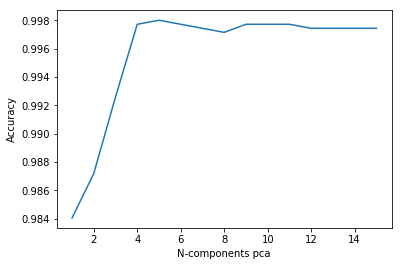

In [9]:
#PCA

acc1 = []
n = [i for i in range(1,16)]
for i in range(1,16):
    pca = PCA(n_components=i)

    X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

    X_train = pca.fit_transform(X_train) 
    X_test = pca.transform(X_test) 

    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    #print("Accuracy ",accuracy_score(y_test, y_pred))
    #print()
    if (i == 2):
        acc.append(accuracy_score(y_test, y_pred))
    acc1.append(accuracy_score(y_test, y_pred))
    #print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    
plt.plot(n,acc1)
plt.ylabel("Accuracy")
plt.xlabel("N-components pca")
plt.show()

In [11]:
#Inferences

#Knn with unprocessed data has higher accuracy than the processed data with normalization, standardization, pca
#for n-components >= 7  pca gives approximately the same accuracy as that with non-reduced data

In [13]:
# Feature Selection
tr = pd.DataFrame(file)
cl = tr['Class']
tr = tr[['SEX','AGEGRP','REGION','REFILL_COUNT','ADMTYP','Total Knee Arthrolplasty','TOTAL HIP ANTHROPLASTY','Medicine']]
X_train, X_test, y_train, y_test = train_test_split(tr, cl, test_size = 0.3, random_state = 42)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print("Accuracy ",accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy  0.9994301994301994
Confusion Matrix
[[1363    2]
 [   0 2145]]


In [18]:
from prettytable import PrettyTable
t = PrettyTable(['Data', 'Accuracy (KNN - n = 5)'])
t.add_row(['Original',acc[0]])
t.add_row(['Standard',acc[2]])
t.add_row(['Normalised',acc[1]])
t.add_row(['Feature Selection',acc[4]])
t.add_row(['PCA(n = 2)',acc[3]])
print(t)

+-------------------+------------------------+
|        Data       | Accuracy (KNN - n = 5) |
+-------------------+------------------------+
|      Original     |   0.9994301994301994   |
|      Standard     |   0.998005698005698    |
|     Normalised    |   0.9977207977207977   |
| Feature Selection |   0.9866096866096866   |
|     PCA(n = 2)    |   0.9866096866096866   |
+-------------------+------------------------+
